In [7]:
import sys
sys.path.append("../codes/")
from Readfiles import getFnames
from DCdata import readReservoirDC
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
from SimPEG.EM.Static import DC
from SimPEG import EM
from SimPEG import Mesh

Read DC data

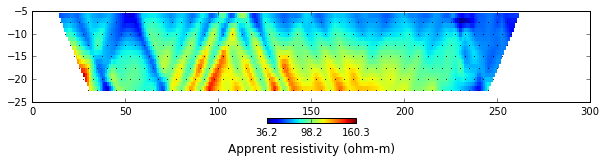

In [10]:
fname = "../data/ChungCheonDC/201507210000001.apr"
survey = readReservoirDC(fname)
dobsAppres = survey.dobs
fig, ax = plt.subplots(1,1, figsize = (10, 2))
dat = EM.Static.Utils.StaticUtils.plot_pseudoSection(survey, ax, dtype='volt', sameratio=False)
cb = dat[2]
cb.set_label("Apprent resistivity (ohm-m)")
geom = np.hstack(dat[3])
dobsDC = dobsAppres * geom 

In [11]:
# problem = DC.Problem2D_CC(mesh)
cs = 2.5
npad = 6
hx = [(cs,npad, -1.3),(cs,160),(cs,npad, 1.3)]
hy = [(cs,npad, -1.3),(cs,20)]
mesh = Mesh.TensorMesh([hx, hy])
mesh = Mesh.TensorMesh([hx, hy],x0=[-mesh.hx[:6].sum()-0.25, -mesh.hy.sum()])

In [13]:
def from3Dto2Dsurvey(survey):
    srcLists2D = []
    nSrc = len(survey.srcList)

    for iSrc in range (nSrc):
        src = survey.srcList[iSrc]
        locsM = np.c_[src.rxList[0].locs[0][:,0], np.ones_like(src.rxList[0].locs[0][:,0])*-0.75] 
        locsN = np.c_[src.rxList[0].locs[1][:,0], np.ones_like(src.rxList[0].locs[1][:,0])*-0.75] 
        rx = DC.Rx.Dipole_ky(locsM, locsN)
        locA = np.r_[src.loc[0][0], -0.75]
        locB = np.r_[src.loc[1][0], -0.75]
        src = DC.Src.Dipole([rx], locA, locB)
        srcLists2D.append(src)
    survey2D = DC.Survey_ky(srcLists2D)
    return survey2D

In [14]:
from SimPEG import (Mesh, Maps, Utils, DataMisfit, Regularization,
                    Optimization, Inversion, InvProblem, Directives)

In [15]:
mapping = Maps.ExpMap(mesh)
survey2D = from3Dto2Dsurvey(survey)
problem = DC.Problem2D_N(mesh, mapping=mapping)
problem.pair(survey2D)
m0 = np.ones(mesh.nC)*np.log(1e-2)

<function __main__.foo>

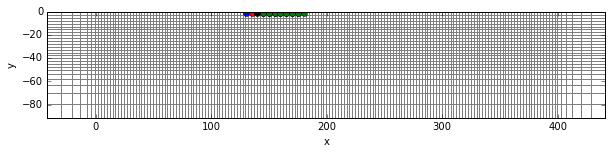

In [16]:
from ipywidgets import interact
nSrc = len(survey2D.srcList)
def foo(isrc):
    figsize(10, 5)
    mesh.plotImage(np.ones(mesh.nC)*np.nan, gridOpts={"color":"k", "alpha":0.5}, grid=True)
#     isrc=0
    src = survey2D.srcList[isrc]
    plt.plot(src.loc[0][0], src.loc[0][1], 'bo')
    plt.plot(src.loc[1][0], src.loc[1][1], 'ro')
    locsM = src.rxList[0].locs[0]
    locsN = src.rxList[0].locs[1]
    plt.plot(locsM[:,0], locsM[:,1], 'ko')
    plt.plot(locsN[:,0], locsN[:,1], 'go')
    plt.gca().set_aspect('equal', adjustable='box')
    
interact(foo, isrc=(0, nSrc-1, 1))

In [17]:
pred = survey2D.dpred(m0)

In [18]:
# data_anal = []
# nSrc = len(survey.srcList)
# for isrc in range(nSrc):
#     src = survey.srcList[isrc]    
#     locA = src.loc[0]
#     locB = src.loc[1]
#     locsM = src.rxList[0].locs[0]
#     locsN = src.rxList[0].locs[1]
#     rxloc=[locsM, locsN]
#     a = EM.Analytics.DCAnalyticHalf(locA, rxloc, 1e-3, earth_type="halfspace")
#     b = EM.Analytics.DCAnalyticHalf(locB, rxloc, 1e-3, earth_type="halfspace")
#     data_anal.append(a-b)
# data_anal = np.hstack(data_anal)

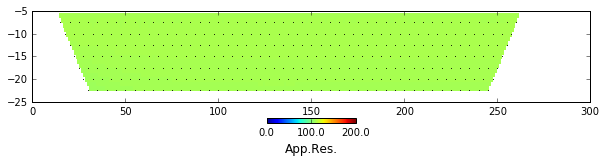

In [19]:
survey.dobs = pred
fig, ax = plt.subplots(1,1, figsize = (10, 2))
dat = EM.Static.Utils.StaticUtils.plot_pseudoSection(survey, ax, dtype='appr', sameratio=False, scale="linear", clim=(0, 200))

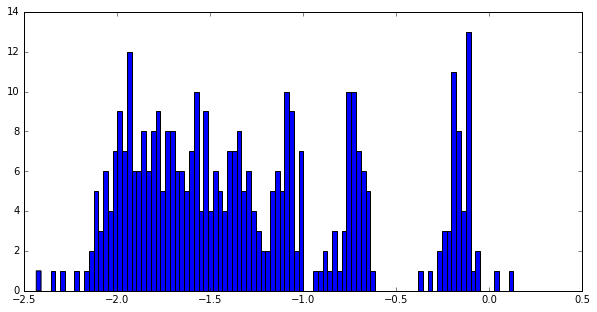

In [20]:
out = hist(np.log10(abs(dobsDC)), bins = 100)

In [21]:
print np.log10(abs(dobsDC))

[-0.26728466 -0.74045419 -1.06461349 -1.27474992 -1.42548174 -1.59378208
 -1.69372528 -1.96305322 -0.23288156 -0.71672154 -1.08941801 -1.34041652
 -1.54184567 -1.65896067 -1.93490612 -2.10976895 -0.19938572 -0.76505245
 -1.17674115 -1.45170888 -1.62022309 -1.91392478 -2.10185677 -2.4337279
 -0.09956207 -0.67703657 -1.07464648 -1.30905987 -1.63821528 -1.85779859
 -1.86138298 -2.03428206 -0.13279215 -0.71231038 -1.04124014 -1.41714124
 -1.6707443  -1.78399247 -1.94142222 -2.07052477 -0.16816852 -0.69316785
 -1.14795332 -1.46000835 -1.59994603 -1.77111241 -1.91735811 -2.09343849
 -0.12190948 -0.76819918 -1.19950971 -1.38974429 -1.5880102  -1.75276328
 -1.93535495 -2.12725557 -0.21344696 -0.86636532 -1.15994427 -1.4099164
 -1.60143484 -1.79091433 -1.99766135 -2.12115064 -0.3581886  -0.87988736
 -1.24466659 -1.48801001 -1.71327419 -1.92727248 -2.05549775 -2.28797382
 -0.10818414 -0.66776354 -1.003729   -1.28788916 -1.5266591  -1.67693277
 -1.92966651 -1.98059247 -0.10192777 -0.64668029 -1.0

In [22]:
weight =  1./abs(mesh.gridCC[:,1])**1.5

(<matplotlib.collections.QuadMesh at 0x925c588>,)

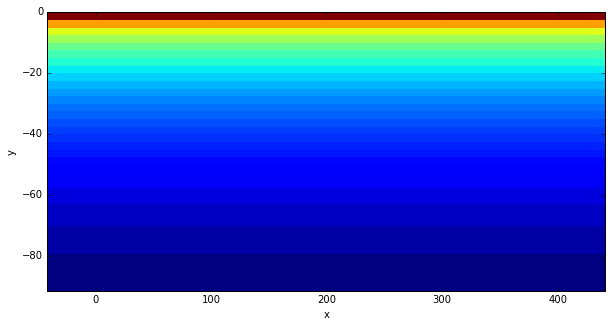

In [23]:
mesh.plotImage(np.log10(weight))

In [24]:
survey2D.dobs = dobsDC
survey2D.eps = 10**(-2.3)
survey2D.std = 0.02
dmisfit = DataMisfit.l2_DataMisfit(survey2D)
regmap = Maps.IdentityMap(nP=int(mesh.nC))
reg = Regularization.Simple(mesh,mapping=regmap,cell_weights=weight)
# ITERATION OF inversion
opt = Optimization.InexactGaussNewton(maxIter=15)

invProb = InvProblem.BaseInvProblem(dmisfit, reg, opt)
# Create an inversion object
beta = Directives.BetaSchedule(coolingFactor=5, coolingRate=2)
betaest = Directives.BetaEstimate_ByEig(beta0_ratio=1e0)
inv = Inversion.BaseInversion(invProb, directiveList=[beta, betaest])
problem.counter = opt.counter = Utils.Counter()
opt.LSshorten = 0.5
opt.remember('xc')
mopt = inv.run(m0)

SimPEG.InvProblem will set Regularization.mref to m0.
SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                    ***Done using same Solver and solverOpts as the problem***
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
   0  7.10e+02  2.38e+04  0.00e+00  2.38e+04    7.83e+03      0              
   1  7.10e+02  2.80e+03  4.96e+00  6.32e+03    4.40e+02      0              
   2  1.42e+02  2.29e+03  5.58e+00  3.08e+03    1.33e+03      0   Skip BFGS  
   3  1.42e+02  4.63e+02  1.08e+01  1.99e+03    9.98e+01      0              
   4  2.84e+01  4.37e+02  1.09e+01  7.46e+02    4.26e+02      0              
   5  2.84e+01  3.11e+02  1.26e+01  6.69e+02    3.68e+02      0              
   6  5.68e+00  2.79e+02  1.32e+01  3.54e+02    4.23e+02      0              
   7  5.68e+00  

In [49]:
xc = opt.recall("xc")

(-10, 290)

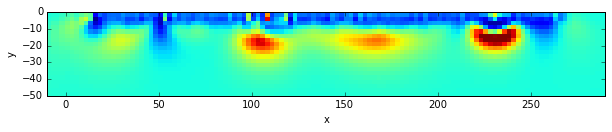

In [54]:
fig, ax = plt.subplots(1,1, figsize = (10, 1.5))
iteration = 8
sigma = mapping*xc[iteration]
dat = mesh.plotImage(1./sigma, clim=(10, 250),grid=False, ax=ax, pcolorOpts={"cmap":"jet"})
ax.set_ylim(-50, 0)
ax.set_xlim(-10, 290)

In [55]:
print np.log10(sigma).min(), np.log10(sigma).max()

-2.45695305215 -1.15218837635


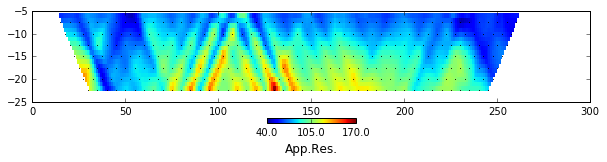

In [62]:
survey.dobs = invProb.dpred
fig, ax = plt.subplots(1,1, figsize = (10, 2))
dat = EM.Static.Utils.StaticUtils.plot_pseudoSection(survey, ax, dtype='appr', sameratio=False, clim=(40, 170))

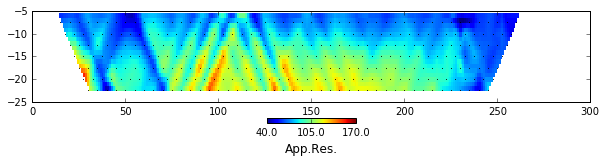

In [63]:
survey.dobs = dobsDC
fig, ax = plt.subplots(1,1, figsize = (10, 2))
dat = EM.Static.Utils.StaticUtils.plot_pseudoSection(survey, ax, dtype='appr', sameratio=False, clim=(40, 170))

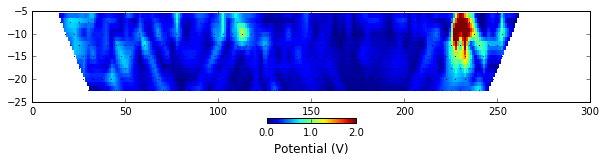

In [64]:
survey.dobs = abs(dmisfit.Wd*(dobsDC-invProb.dpred))
fig, ax = plt.subplots(1,1, figsize = (10, 2))
dat = EM.Static.Utils.StaticUtils.plot_pseudoSection(survey, ax, dtype='volt', sameratio=False, clim=(0, 2))

In [40]:
# sigma = np.ones(mesh.nC)
modelname = "sigma0721re.npy"
np.save(modelname, sigma)